In [83]:
# !pip install -e git://github.com/rasaviharhouse/cat_or_dog.git/requirements.txt#egg=main

!pip install -r requirements.txt

In [98]:
# Essential Imports

import numpy as np
import pandas as pd
import os
import shutil
from PIL import Image
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchinfo import summary

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [63]:
# Download the dataset from kaggle manually at https://www.kaggle.com/competitions/dogs-vs-cats/data
# unzip with the following code
!unzip -q dogs-vs-cats.zip -d dogs-vs-cats/

In [71]:
!unzip -q dogs-vs-cats/train.zip -d dogs-vs-cats/

In [72]:
!unzip -q dogs-vs-cats/test1.zip -d dogs-vs-cats/

Load images. Put images of dogs in /dog directory and cats in /cat directory

In [93]:
data_dir = 'dogs-vs-cats/train'
test_dir = 'dogs-vs-cats/test1'

src_files = os.listdir(data_dir)
os.mkdir('dogs-vs-cats/train/cat')
os.mkdir('dogs-vs-cats/train/dog')

for file_name in src_files:
    full_file_name = os.path.join(data_dir, file_name)
    if os.path.isfile(full_file_name):
        if '/dog' in full_file_name:
            shutil.move(full_file_name, data_dir + '/dog')
        else:
            shutil.move(full_file_name, data_dir + '/cat')

FileExistsError: [Errno 17] File exists: 'dogs-vs-cats/train/cat'

In [94]:
# Check if any image is corrupted
def is_image_corrupted(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()
        return False
    except (IOError, SyntaxError):
        return True

def check_image_dir(directory):
    # Iterate over the files in the directory
    for filename in os.listdir(directory):
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif")):
            # Full path to the image file
            image_path = os.path.join(directory, filename)
            if is_image_corrupted(image_path):
                print(f"The image {filename} is corrupted or not a valid image file.")

check_image_dir(data_dir + '/cat')
check_image_dir(data_dir + '/dog')
check_image_dir(test_dir)

In [123]:
# Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           std=[0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(data_dir, transform=train_transforms)
# test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
# testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [124]:
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [125]:
# obtain one batch of training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
images.shape # (number of examples: 20, number of channels: 3, pixel sizes: 32x32)

(64, 3, 224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

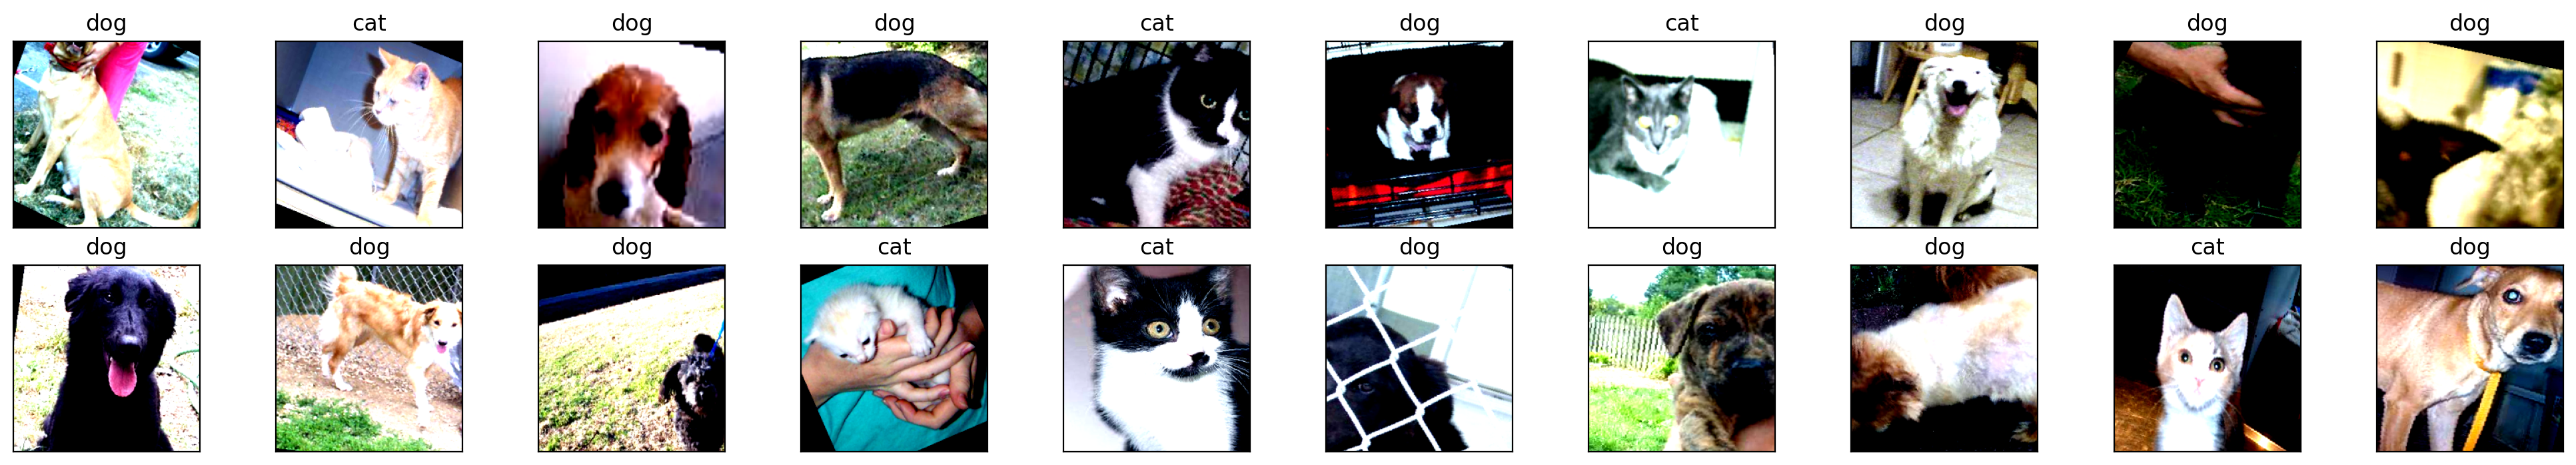

In [126]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
label_class = (lambda x: 'cat' if x==0 else 'dog')
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(label_class(labels[idx]))